# Women's football popularity is on the rise

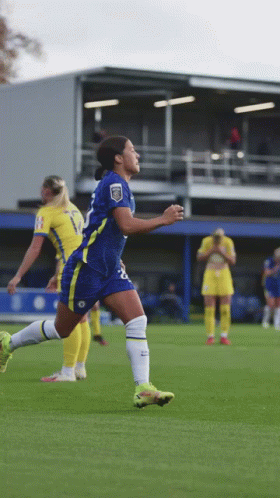

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import stats
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [37]:
womens_football = '/Users/jenniferrobbins/Downloads/results.csv'
df = pd.read_csv(womens_football)
df.head()

date home_team     away_team  home_score  away_score tournament  \
0  1969-11-01     Italy        France           1           0       Euro   
1  1969-11-01   Denmark       England           4           3       Euro   
2  1969-11-02   England        France           2           0       Euro   
3  1969-11-02     Italy       Denmark           3           1       Euro   
4  1970-07-06   England  West Germany           5           1  World Cup   

     city country  neutral  
0  Novara   Italy    False  
1   Aosta   Italy     True  
2   Turin   Italy     True  
3   Turin   Italy    False  
4  Genova   Italy     True

In [38]:
df['date'] = pd.to_datetime(df['date'])
df['Match_year'] = df['date'].dt.year
df['Match_month'] =df['date'].dt.month
df.head()

date home_team     away_team  home_score  away_score tournament  \
0 1969-11-01     Italy        France           1           0       Euro   
1 1969-11-01   Denmark       England           4           3       Euro   
2 1969-11-02   England        France           2           0       Euro   
3 1969-11-02     Italy       Denmark           3           1       Euro   
4 1970-07-06   England  West Germany           5           1  World Cup   

     city country  neutral  Match_year  Match_month  
0  Novara   Italy    False        1969           11  
1   Aosta   Italy     True        1969           11  
2   Turin   Italy     True        1969           11  
3   Turin   Italy    False        1969           11  
4  Genova   Italy     True        1970            7

In [3]:
mens_football = '/Users/jenniferrobbins/Downloads/resultsmen.csv'
df_m = pd.read_csv(mens_football, index_col = 'date', parse_dates = True)
df_m.head()

home_team away_team  home_score  away_score tournament     city  \
date                                                                         
1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

             country  neutral  
date                           
1872-11-30  Scotland    False  
1873-03-08   England    False  
1874-03-07  Scotland    False  
1875-03-06   England    False  
1876-03-04  Scotland    False

## Descriptions of each column

##### 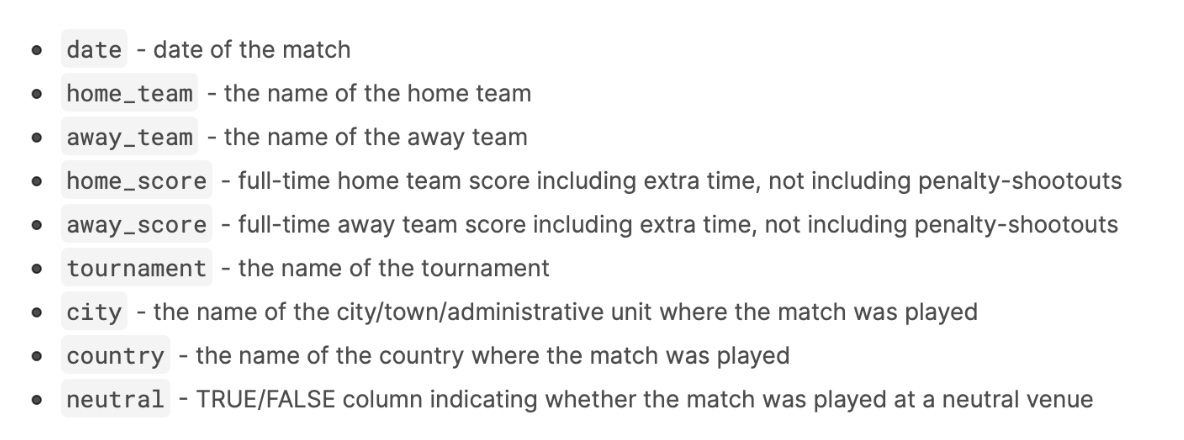

In [39]:
df.shape

(5595, 11)

In [5]:
df_m.shape

(44060, 8)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595 entries, 0 to 5594
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5595 non-null   datetime64[ns]
 1   home_team    5595 non-null   object        
 2   away_team    5595 non-null   object        
 3   home_score   5595 non-null   int64         
 4   away_score   5595 non-null   int64         
 5   tournament   5595 non-null   object        
 6   city         5595 non-null   object        
 7   country      5595 non-null   object        
 8   neutral      5595 non-null   bool          
 9   Match_year   5595 non-null   int64         
 10  Match_month  5595 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(5)
memory usage: 442.7+ KB


In [41]:
df.dtypes

date           datetime64[ns]
home_team              object
away_team              object
home_score              int64
away_score              int64
tournament             object
city                   object
country                object
neutral                  bool
Match_year              int64
Match_month             int64
dtype: object

In [42]:
df.describe

<bound method NDFrame.describe of            date      home_team         away_team  home_score  away_score  \
0    1969-11-01          Italy            France           1           0   
1    1969-11-01        Denmark           England           4           3   
2    1969-11-02        England            France           2           0   
3    1969-11-02          Italy           Denmark           3           1   
4    1970-07-06        England      West Germany           5           1   
...         ...            ...               ...         ...         ...   
5590 2023-02-22  United States            Brazil           2           1   
5591 2023-02-23       Paraguay            Panama           0           1   
5592 2023-02-23         Taiwan  Papua New Guinea           5           0   
5593 2023-02-23    New Zealand         Argentina           0           1   
5594 2023-04-06        England            Brazil           1           1   

                        tournament      city        c

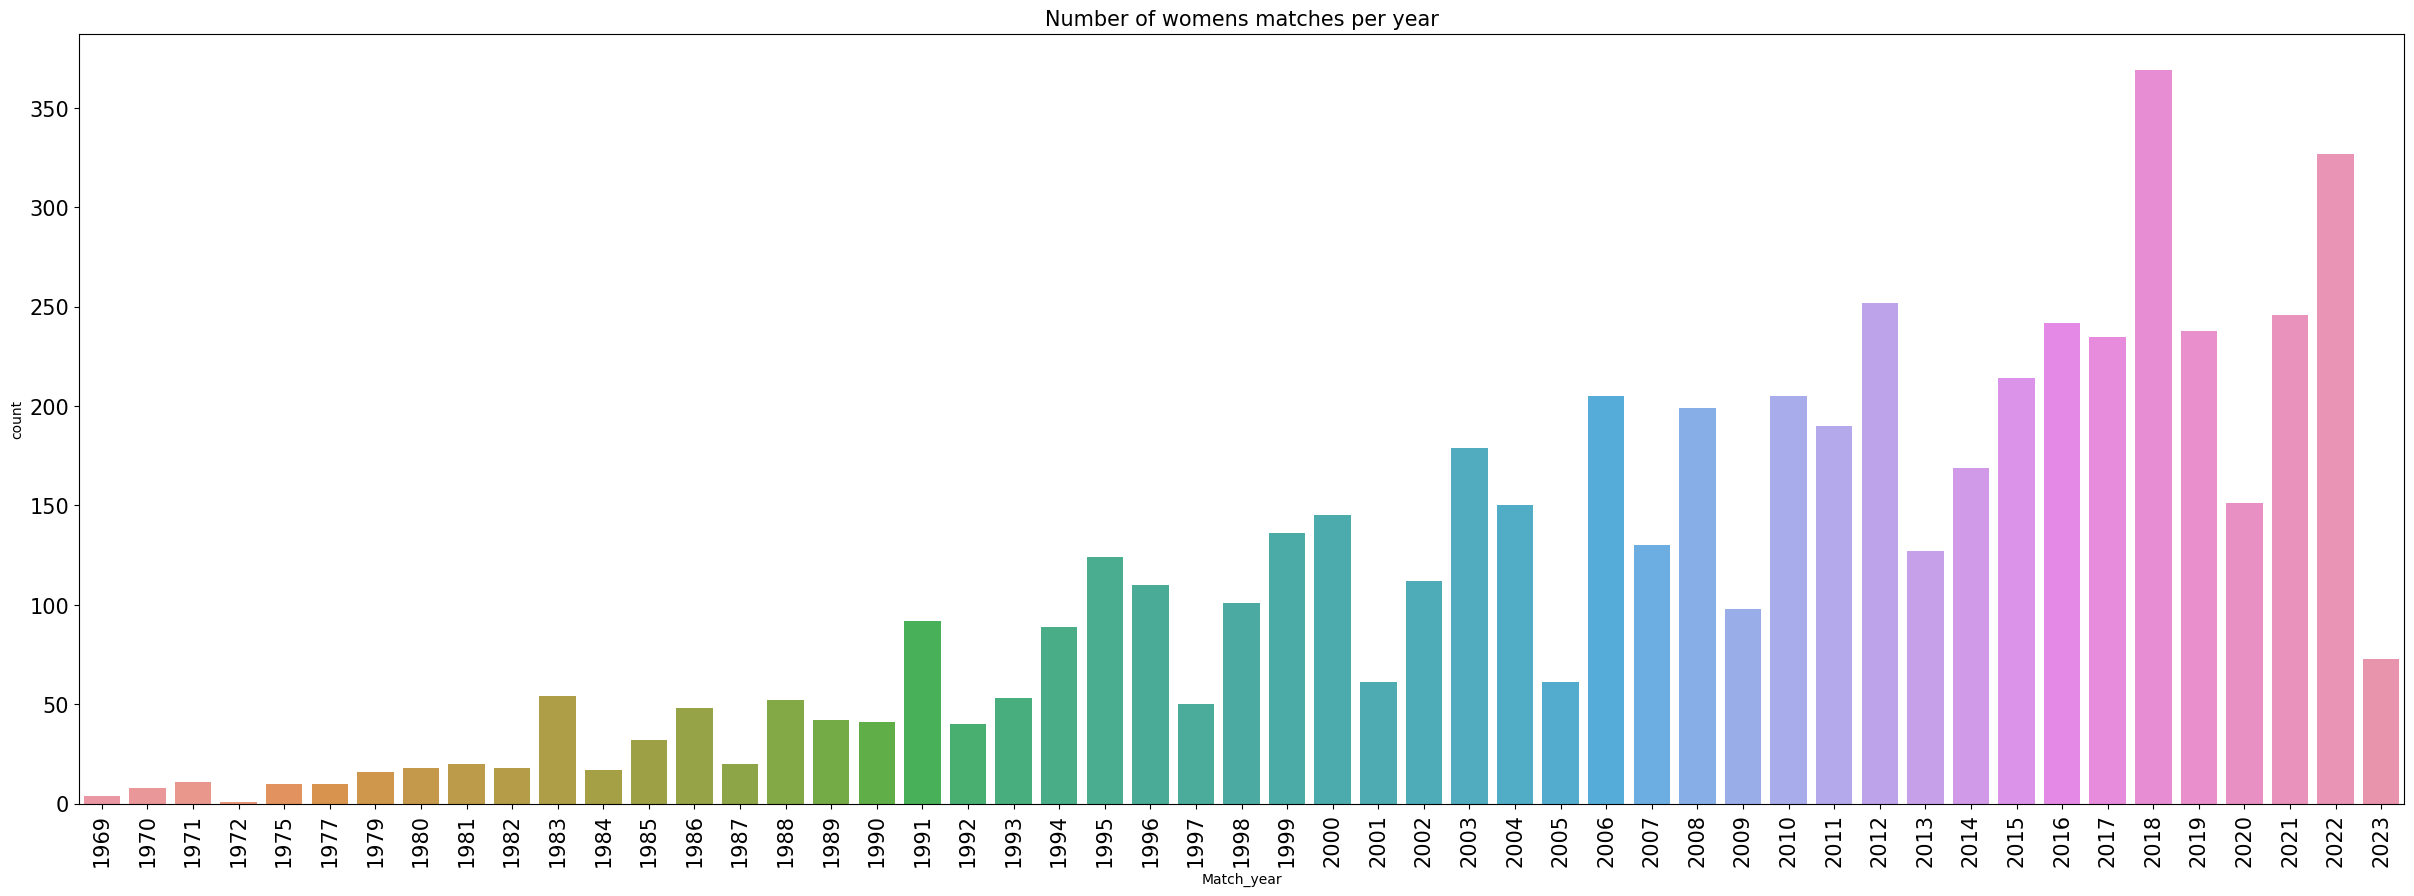

In [54]:
plt.figure(figsize = (30, 10))
g = sns.countplot(df['Match_year'])
g = plt.xticks(rotation = 90, fontsize = 15)
g = plt.yticks(fontsize = 15)
g = plt.title('Number of womens matches per year', fontsize = 15)

In [10]:
df_m = df_m[df_m.index.year > 1968]

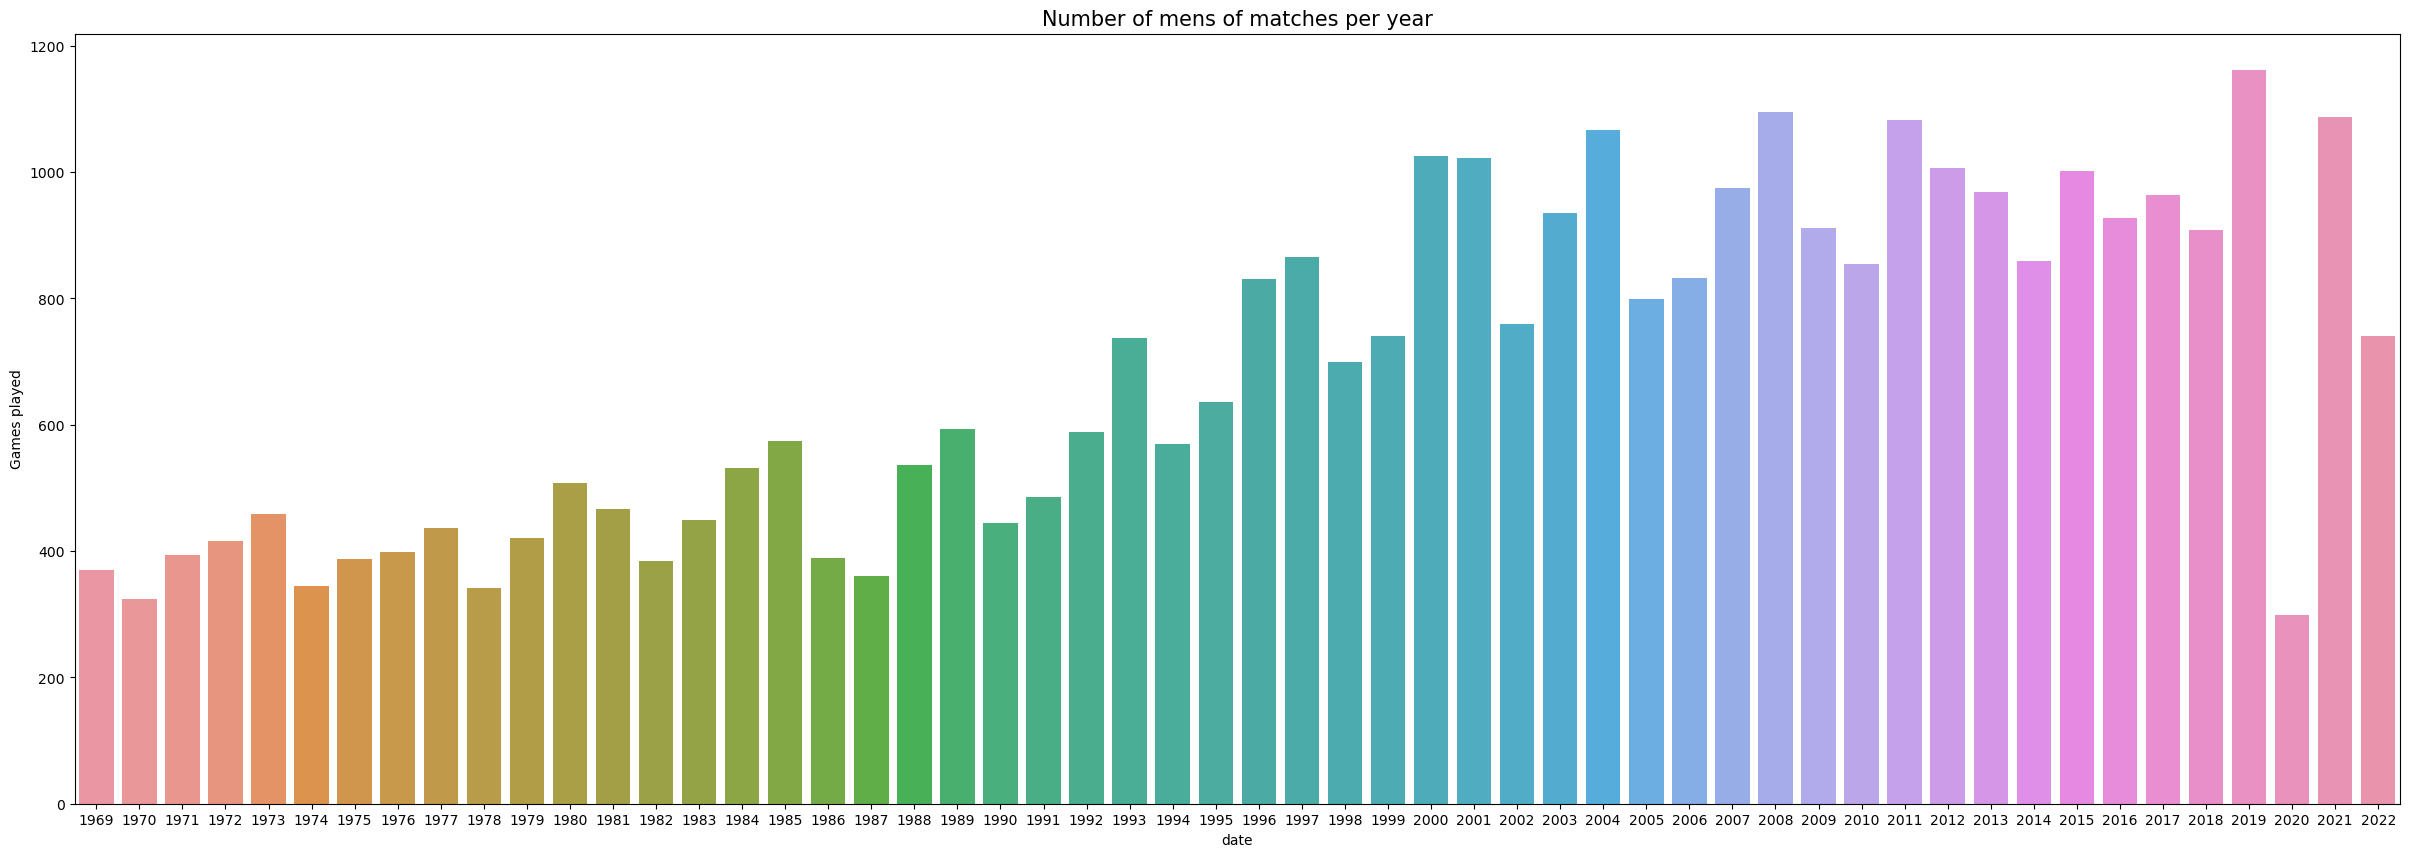

In [53]:
plt.figure(figsize = (30, 10))
plt.title('Number of mens of matches per year', fontsize = 15)
ax = sns.barplot(x =df_m.groupby(df_m.index.year).count().index ,y = df_m.groupby(df_m.index.year).count().home_team)
ax.set(ylabel = 'Games played')
plt.show()

In [12]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# Above we can see women's matches have been on the rise, and in comparison to men's matches we can see a sharper increase in the recent years

## It will be interesting to see how the women's football data will be impacted by the 2023 World Cup

## Here are the tournaments

/Users/jenniferrobbins/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


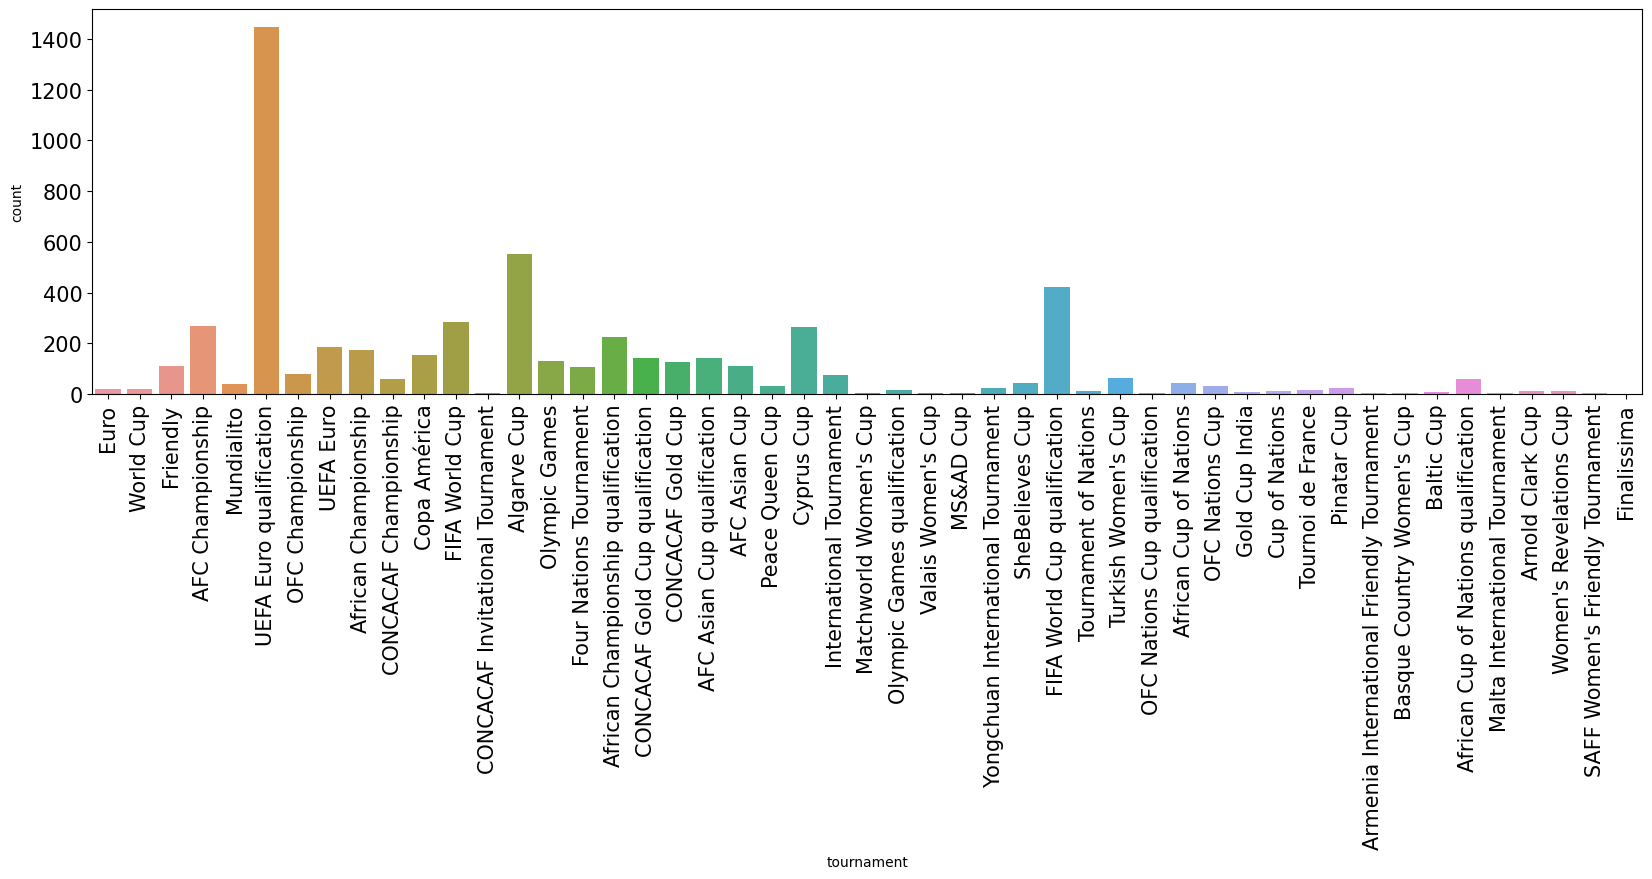

In [15]:
plt.figure(figsize = (20,5))
g = sns.countplot(df['tournament'])
g = plt.xticks(rotation  = 90, fontsize = 15)
g = plt.yticks(fontsize = 15)

In [16]:
values = df['tournament'].value_counts()
names= df['tournament'].value_counts().index

fig = px.pie(values = values, names = names, title = 'Tournament Type')
fig.update_traces(textinfo = 'label + percent', marker=dict(line=dict(color='#000000', width=1)))
fig.show()

## The UEFA Euro qualification counts for 25.8% of the tournaments

In [55]:
df_UEFA = df.query("(tournament == 'UEFA Euro qualification') | (tournament == 'UEFA Euro')")
df_UEFA.head()

date         home_team away_team  home_score  away_score  \
98  1982-08-18           Finland    Sweden           0           6   
99  1982-08-28            Norway   Iceland           2           2   
100 1982-09-04  Northern Ireland  Scotland           1           2   
101 1982-09-09           Iceland    Sweden           0           6   
102 1982-09-15           Finland    Norway           0           3   

                  tournament       city           country  neutral  \
98   UEFA Euro qualification    Vammala           Finland    False   
99   UEFA Euro qualification   Tønsberg            Norway    False   
100  UEFA Euro qualification    Belfast  Northern Ireland    False   
101  UEFA Euro qualification  Kópavogur           Iceland    False   
102  UEFA Euro qualification      Kotka           Finland    False   

     Match_year  Match_month  
98         1982            8  
99         1982            8  
100        1982            9  
101        1982            9  
102        1982            9

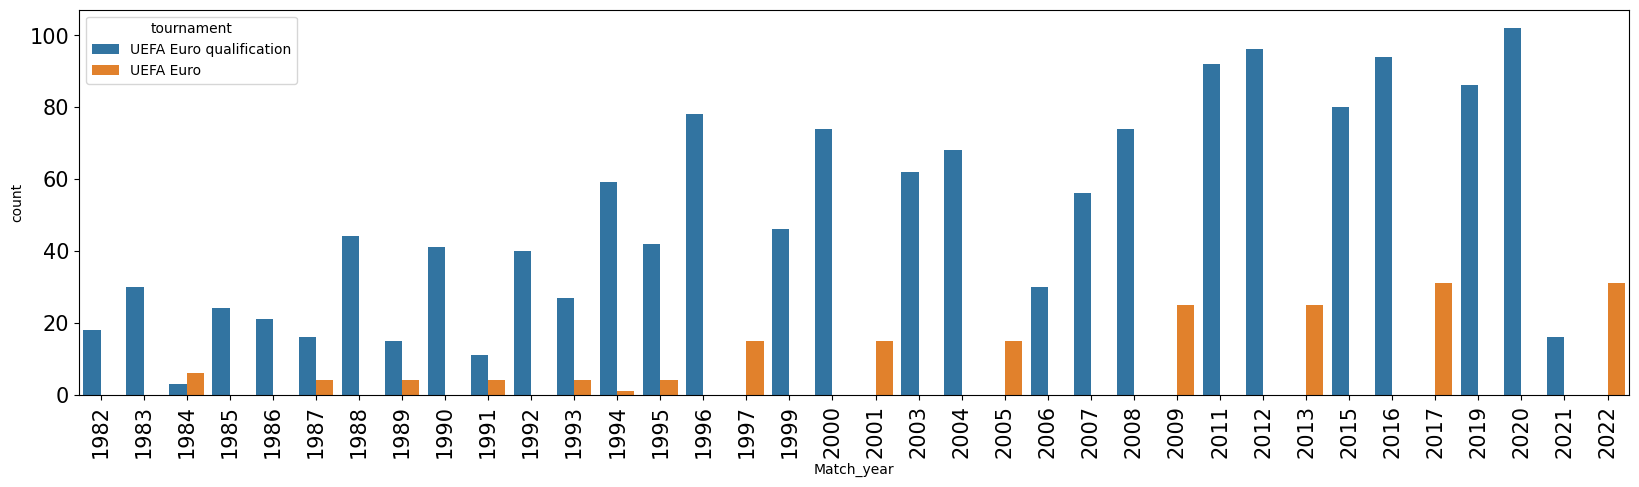

In [56]:
plt.figure(figsize = (20,5))
g = sns.countplot(data = df_UEFA, x= 'Match_year', hue = 'tournament')
g = plt.xticks(rotation  = 90, fontsize = 15)
g = plt.yticks(fontsize = 15)

In [61]:
df_worldcup = df.query("(tournament == 'FIFA World Cup qualification') | (tournament == 'FIFA World Cup')")
df_worldcup.head()

date home_team      away_team  home_score  away_score  \
487 1991-11-16  China PR         Norway           4           0   
488 1991-11-17   Denmark    New Zealand           3           0   
489 1991-11-17     Japan         Brazil           0           1   
490 1991-11-17    Sweden  United States           2           3   
491 1991-11-17   Germany        Nigeria           4           0   

         tournament       city   country  neutral  Match_year  Match_month  
487  FIFA World Cup  Guangzhou  China PR    False        1991           11  
488  FIFA World Cup  Guangzhou  China PR     True        1991           11  
489  FIFA World Cup     Foshan  China PR     True        1991           11  
490  FIFA World Cup  Guangzhou  China PR     True        1991           11  
491  FIFA World Cup   Jiangmen  China PR     True        1991           11

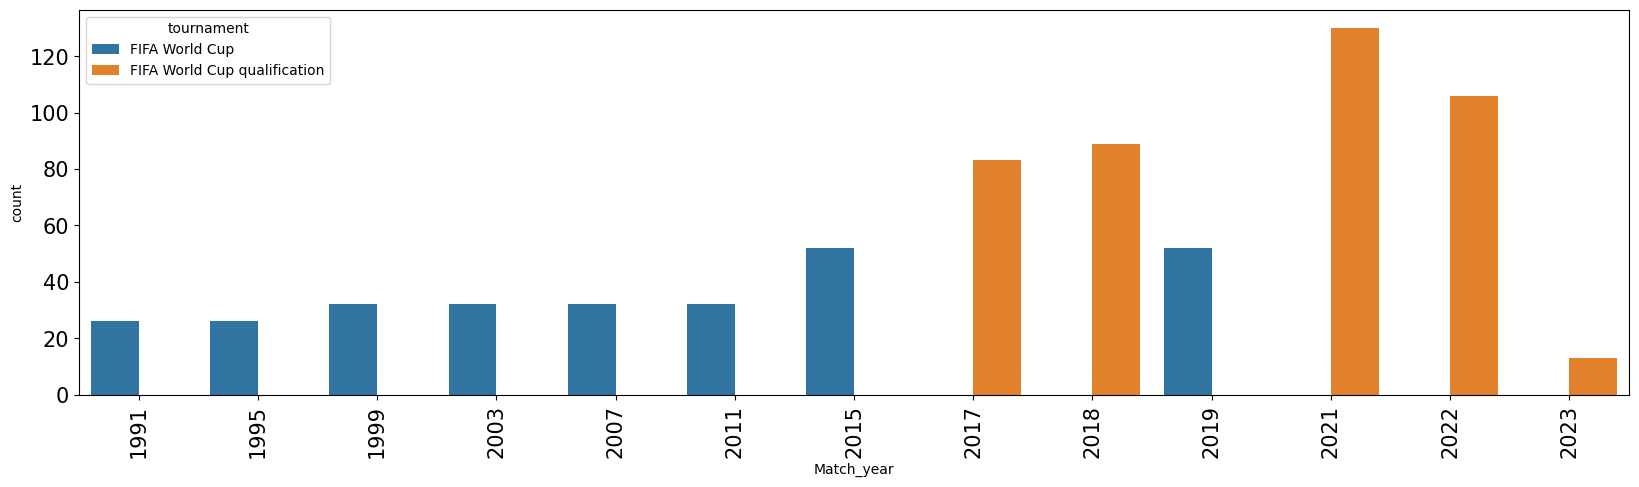

In [62]:
plt.figure(figsize = (20,5))
g = sns.countplot(data = df_worldcup, x= 'Match_year', hue = 'tournament')
g = plt.xticks(rotation  = 90, fontsize = 15)
g = plt.yticks(fontsize = 15)

# Covid definitely had an impact on matches played, but we can see women's football is on the rise. This is a great time to invest in sponsoring these matches.